## Problem Definition

In [11]:
import numpy as np
from scipy.linalg import solve_continuous_are

# Define system dynamics
A = np.array([[1, 0], [0, 1]])
B = np.array([[1, 0], [0, 1]])

Q = 100*np.eye(2)
R = 100*np.eye(2)

P = solve_continuous_are(A, B, Q, R)

K = np.linalg.inv(R) @ B.T @ P

s_0 = np.array([0,0])
goal = np.array([1,0])
s_prime = s_0 - goal

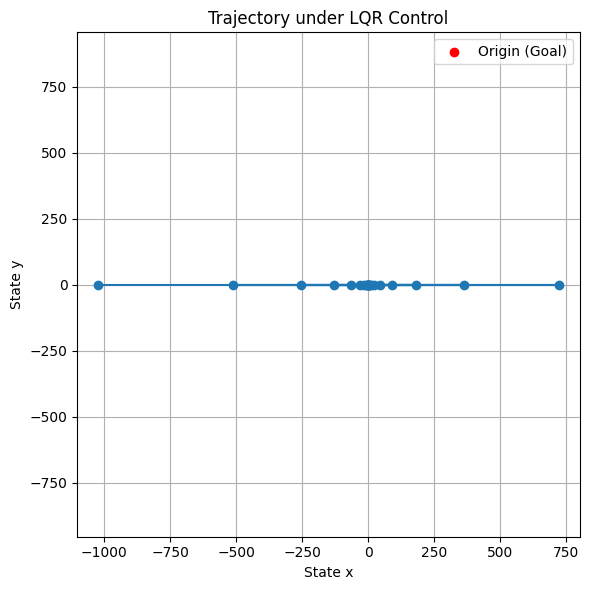

In [8]:
import matplotlib.pyplot as plt

# Simulation parameters
trajectory = [s_prime.copy()]
for _ in range(20):
    u = -K @ s_prime
    s_prime = A @ s_prime + B @ u
    trajectory.append(s_prime.copy())

trajectory = np.array(trajectory)

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o')
plt.scatter([0], [0], c='red', label='Origin (Goal)')
plt.title("Trajectory under LQR Control")
plt.xlabel("State x")
plt.ylabel("State y")
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()


## Meta-Setup